# Build a Bird Detector
Copyright 2021, LEAKY.AI LLC

This is your first exercise for the course.  Here you will:
- Learn how to start coding in Google Colab
- Build a quick neural network that can automatically detect birds
- Upload your own photo and process it with the nerual network

To get started, head over to Google Colab via this link:

https://colab.research.google.com

Good luck!

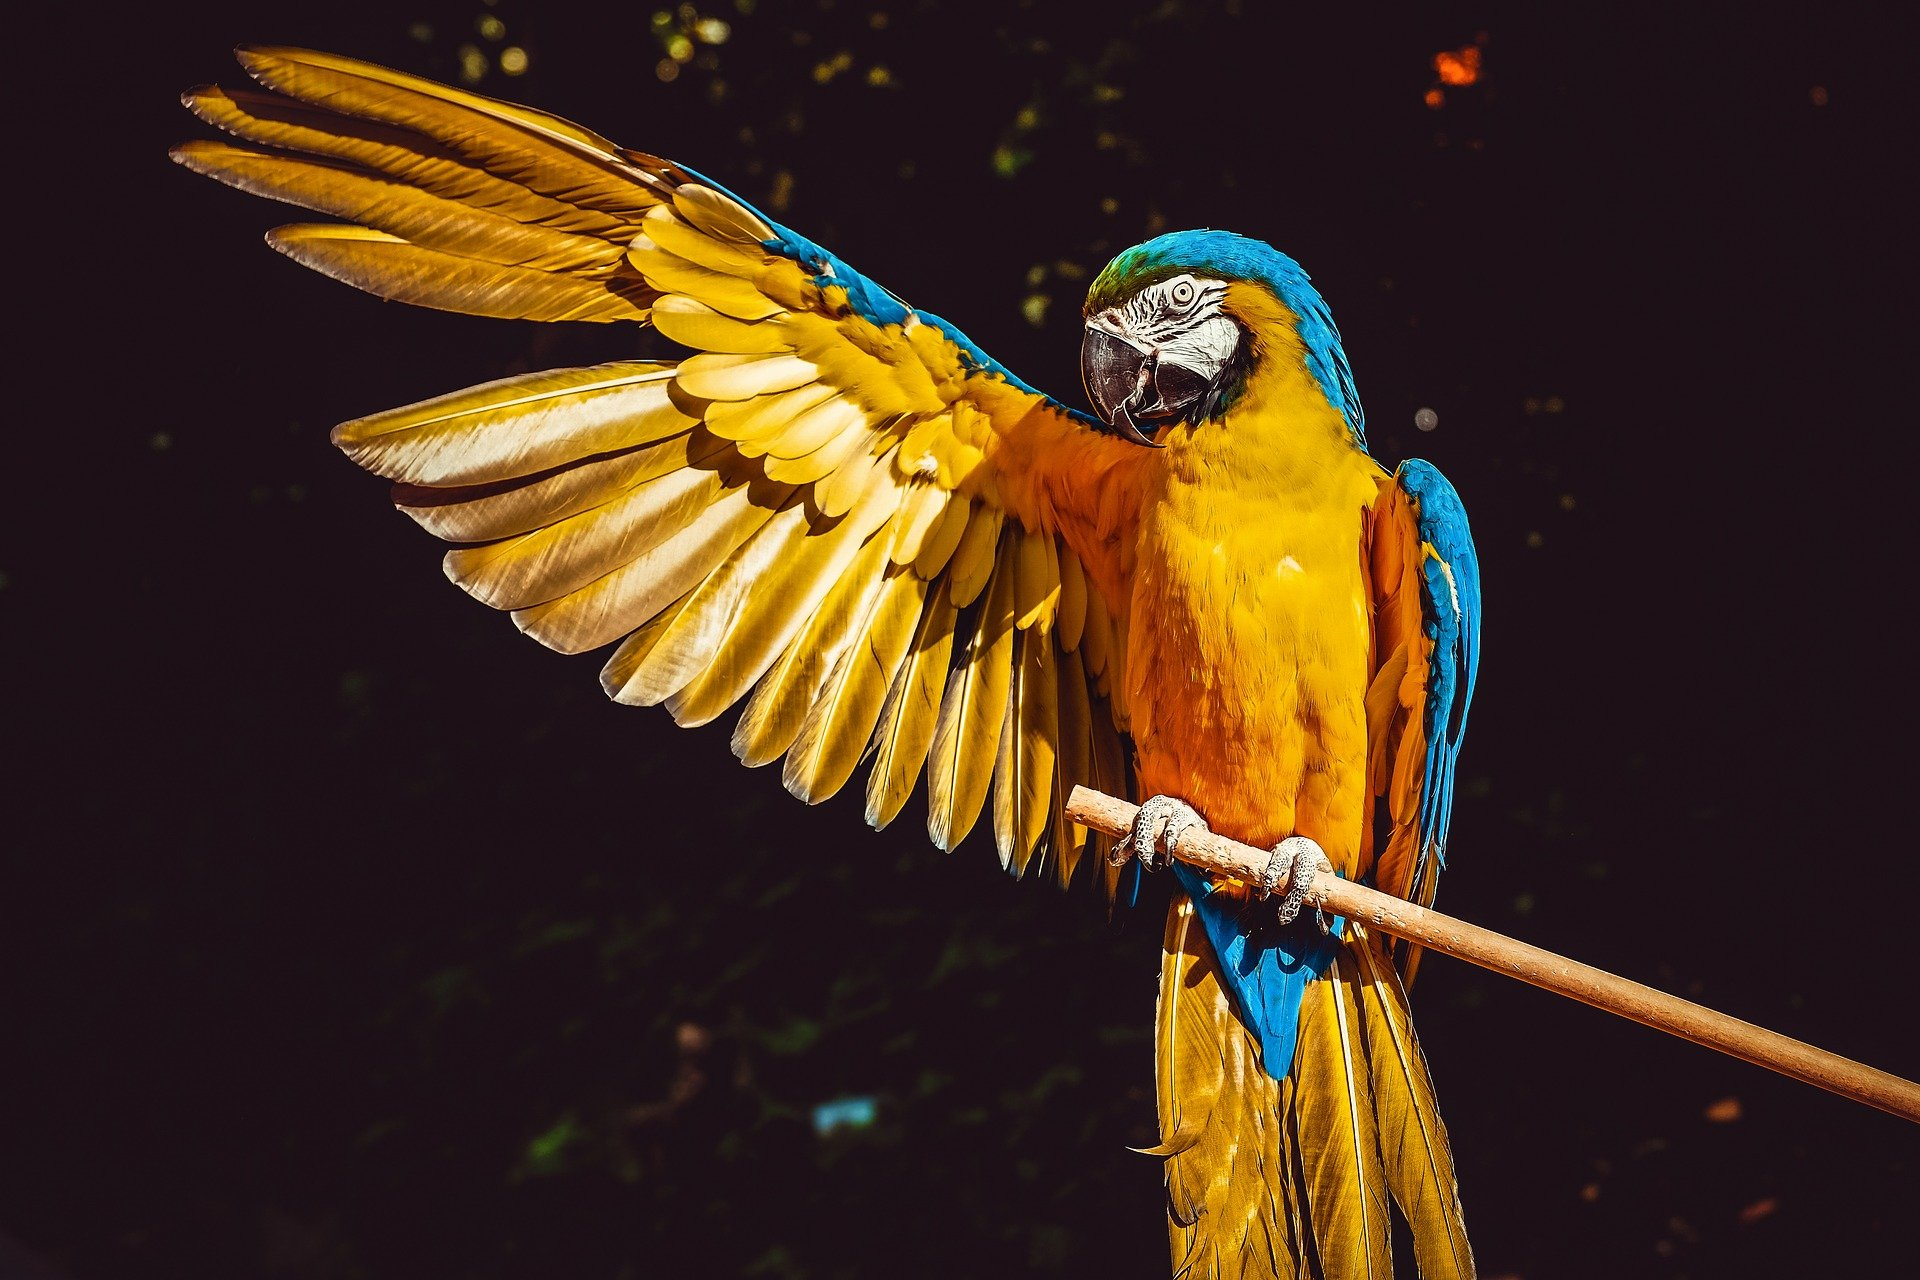

Image by <a href="https://pixabay.com/users/couleur-1195798/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3601194">Couleur</a> from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3601194">Pixabay</a>



## Step 1 - Import the Libraries

In [ ]:
# Import PyTorch, PyTorch transform module and our pre-trained RESNET50 network
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50

## Step 2 - Specify a Transformation and a Model

In [ ]:
# Build a transformation for each image passed into our network
myTransform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create an instance of the RESNET 50 model
net = resnet50(pretrained=True)

# Very important, put the model into evaluation mode
net = net.eval()

## Step 3 - Load an Image

In [ ]:
!wget https://raw.githubusercontent.com/LeakyAI/BirdDetector/main/macaw.jpg
im = Image.open('macaw.jpg')
display(im) 

## Step 4 - Pass the Image Through our Network

In [ ]:
# Pass our image into the network converting it to a batch size of 1
with torch.no_grad():
  out = net(myTransform(im).unsqueeze(0))

# Convert our logits to softmax probabilities
probabilities = torch.nn.functional.softmax(out[0], dim=0)

## Step 5 - Convert Outputs to Meaningful Categories

In [ ]:
# From PyTorch Documentation - read in all ImageNet class names
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [ ]:
# Show top categories per image
top3_prob, top3_catid = torch.topk(probabilities, 3)
for i in range(top3_prob.size(0)):
    print(categories[top3_catid[i]], top3_prob[i].item())

## Try with your own image!

In [ ]:
# Import libraries in order to import an image into the notebook
from google.colab import files
from io import BytesIO
from PIL import Image

# Prompt to upload an image
uploaded = files.upload()

# Display the image
name=list(uploaded.keys())[0]
im = Image.open(BytesIO(uploaded[name]))
display(im)

# Passthrough the network
with torch.no_grad():
  out = net(myTransform(im).unsqueeze(0))

# Convert our logits to categories
probabilities = torch.nn.functional.softmax(out[0], dim=0)
top3_prob, top3_catid = torch.topk(probabilities, 3)
for i in range(top3_prob.size(0)):
    print(categories[top3_catid[i]], top3_prob[i].item())